In [213]:
# 1. Decision Tree

#Import Library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Melakukan pembacaaan dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
print(pima)
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
class_cols = ['0', '1']
x = pima[feature_cols] # Features
y = pima.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
random_state=3)
 # Membuat objek DT
 # Dapat dioptimalkan dengan menghitung Entropy
clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Melakukan Pelatihan DT
clf = clf.fit(X_train,y_train)
# Memprediksi
y_pred = clf.predict(X_test)
# Menghitung akurasimodel
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]
Accuracy: 0.671875


In [214]:
#Visualisasi Tree
from matplotlib import pyplot as plt
from sklearn import tree

text_representation = tree.export_text(clf, feature_names= feature_cols)
print(text_representation)

|--- glucose <= 130.50
|   |--- bmi <= 26.35
|   |   |--- bmi <= 9.10
|   |   |   |--- class: 0
|   |   |--- bmi >  9.10
|   |   |   |--- class: 0
|   |--- bmi >  26.35
|   |   |--- age <= 28.50
|   |   |   |--- class: 0
|   |   |--- age >  28.50
|   |   |   |--- class: 0
|--- glucose >  130.50
|   |--- bmi <= 29.95
|   |   |--- glucose <= 144.50
|   |   |   |--- class: 0
|   |   |--- glucose >  144.50
|   |   |   |--- class: 1
|   |--- bmi >  29.95
|   |   |--- glucose <= 157.50
|   |   |   |--- class: 1
|   |   |--- glucose >  157.50
|   |   |   |--- class: 1



In [215]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

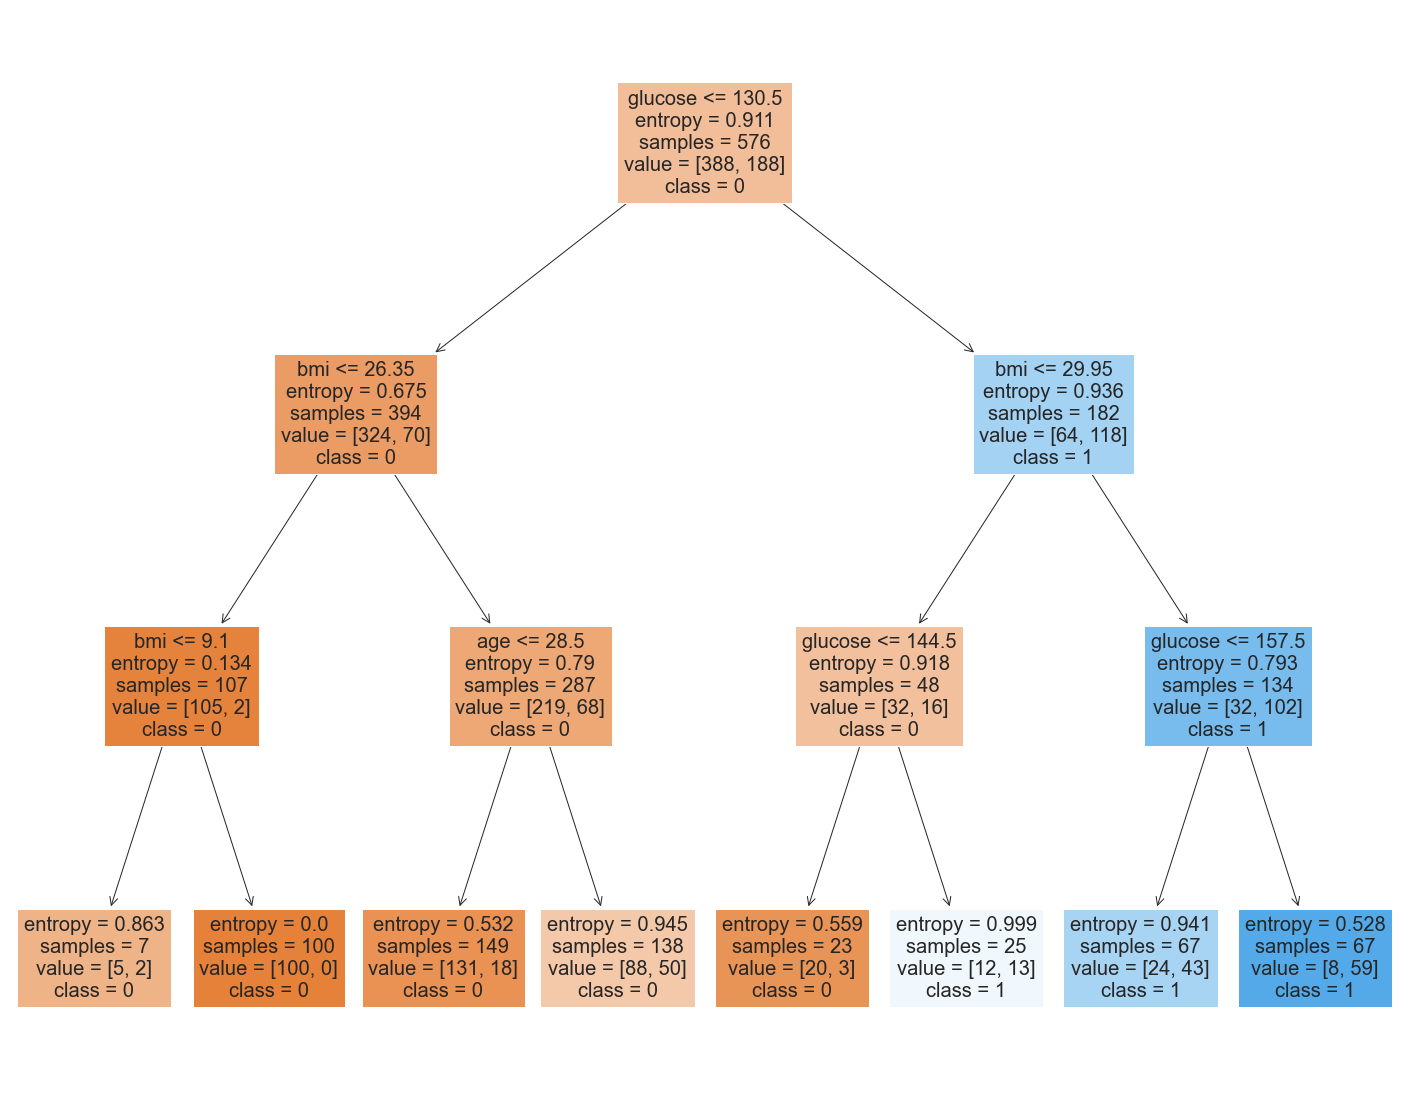

In [216]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names= class_cols,
                   filled=True)

In [150]:
fig.savefig("decistion_tree.png")

In [152]:
# 2. CART (Classification And Regression Tree)

# Load Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
names = boston_dataset.feature_names
#Library CART pada python
from sklearn.tree import DecisionTreeRegressor
array = boston.values
X = array[:,0:13]
Y = array[:,13]
#print(X)
#print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=1234)
#model = DecisionTreeRegressor(max_leaf_nodes = 20)
model = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
 max_leaf_nodes=50, min_impurity_decrease=0.0,
 min_impurity_split=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 random_state=None, splitter='best')
#Evaluasi
rt = model.fit(X_train, Y_train)
rt
import random as rnd
rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,13)
#Prediksi Model
YHat = model.predict(X_new)
df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)
from sklearn.metrics import r2_score
YHat = model.predict(X_test)
print(YHat)
#Menghitung Rata-rata Kuadrat
r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)

[35.51       24.26666667 10.38571429 22.35238095 14.02142857 23.71666667
 19.83421053 15.43571429 20.575      27.45       15.43571429 22.35238095
 22.35238095 18.31666667 17.71111111 23.71666667  8.49285714 16.81428571
 19.83421053 10.38571429 37.73333333 23.71666667 19.83421053 16.81428571
 27.45       19.77142857 19.83421053 22.46428571 31.52857143 22.83333333
 20.575      19.33333333 18.31666667 14.02142857 23.71666667 17.13333333
 20.50714286 22.35238095 10.38571429  8.49285714  8.49285714 18.31666667
 49.78571429 31.76       19.83421053 25.4375     25.4375     42.3
 14.02142857 25.4375     19.83421053 35.51       23.71666667 23.71666667
 50.         31.76       10.38571429 31.52857143 25.4375     22.35238095
 35.51       15.43571429 29.33333333 37.73333333 10.38571429 22.46428571
 35.51       20.50714286 49.78571429 49.15       10.95       23.71666667
 14.02142857 19.18333333 23.71666667 10.38571429 49.15       23.71666667
 15.08181818 15.08181818 42.75       49.78571429 23.716666

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [158]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, Y)

In [179]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



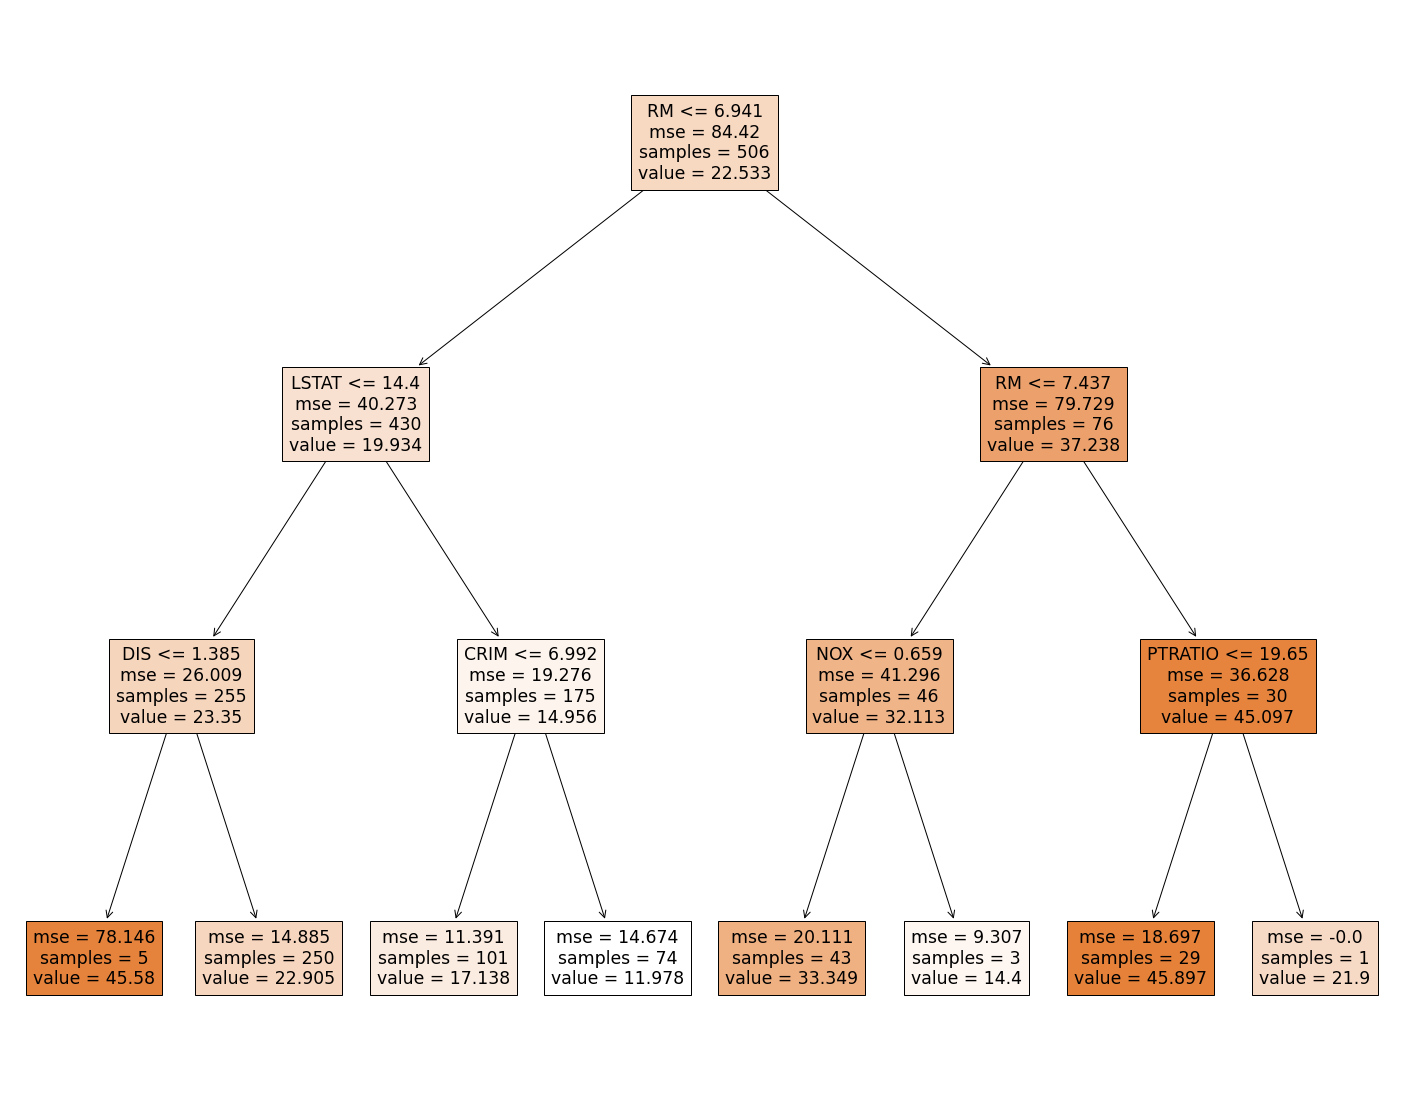

In [177]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=names, filled=True)

In [171]:
fig.savefig("CART.png")

In [185]:
#Impor Library
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
#Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1, stratify=y)
#Melakukan pipelining
pipeline = make_pipeline(StandardScaler(),
 LogisticRegression(random_state=1))
#Skema bagging
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
 max_features=8,
 max_samples=80,
 random_state=1, n_jobs=5)
bgclassifier.fit(X_train, y_train)
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
 'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.958,  Model training Score: 0.960


In [199]:
#No Bagging

#Impor Library
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
#Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1, stratify=y)

# Dapat dioptimalkan dengan menghitung Entropy
clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Melakukan Pelatihan DT
clf = clf.fit(X_train,y_train)
# Memprediksi
y_pred = clf.predict(X_test)
# Menghitung akurasimodel
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9370629370629371
